In [1]:
import tensorflow as tf
tf.__version__

'2.14.1'

# Introduction to regression with neural networks tf

## Creating data to view and fit

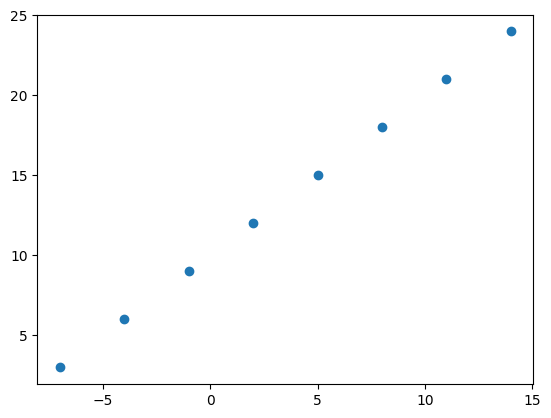

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

# Create labels
y = np.array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X, y)

In [3]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and ouput shapes

In [5]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape, X[0], y[0]

((), (), -7.0, 3.0)

In [8]:
# Turn X and y numpy arrays to tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

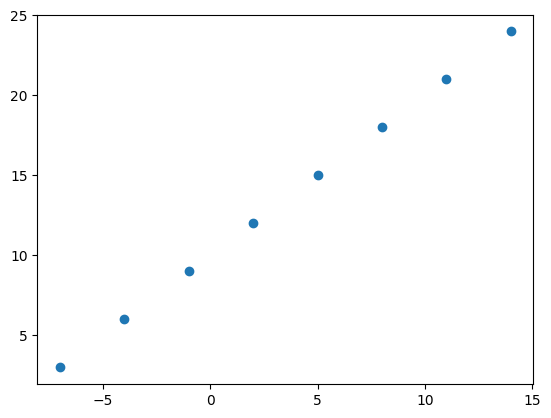

In [10]:
plt.scatter(X, y)

## Steps in modeling with tf

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells out model hw wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a mode** - letting the model try to find patterns between X & y (features and labels).

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # Mae is short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
    metrics=["mae"],
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

# For tf < 2.7.0
# model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 351ms/step - loss: 12.5634 - mae: 12.5634
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 12.4309 - mae: 12.4309
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 12.2984 - mae: 12.2984
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 12.1659 - mae: 12.1659
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 12.0334 - mae: 12.0334


In [12]:
# Check out X, y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try to make a prediction using our model
y_pred = model.predict(tf.constant([17], dtype=tf.float32))
y_pred

1/1 [==============================] - 0s 38ms/step


array([[7.5740004]], dtype=float32)

### Improving our model
We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, chage the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longeer) or on more data (give the model more examples to learn from).

In [14]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 208ms/step - loss: 21.1680 - mae: 21.1680
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 20.7748 - mae: 20.7748
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 20.4173 - mae: 20.4173
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 20.1361 - mae: 20.1361
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 19.8548 - mae: 19.8548
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 19.5736 - mae: 19.5736
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 19.2923 - mae: 19.2923
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 19.0111 - mae: 19.0111
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 18.7298 - mae: 18.7298
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 18.4486 - mae: 18.4486
Epoch 11/100
1/1 [==============================] - 0s 2m

In [15]:
y_pred = model.predict(tf.constant([17.0]))
y_pred

1/1 [==============================] - 0s 27ms/step


array([[29.290663]], dtype=float32)

In [16]:
# Let's rebuild our model (with extra hidden layer with 100 hidden units)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 363ms/step - loss: 13.5541 - mae: 13.5541
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 13.0914 - mae: 13.0914
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.6509 - mae: 12.6509
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 12.2074 - mae: 12.2074
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 11.7712 - mae: 11.7712
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 11.3287 - mae: 11.3287
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8681 - mae: 10.8681
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.3877 - mae: 10.3877
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 9.8864 - mae: 9.8864
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 9.3558 - mae: 9.3558
Epoch 11/100
1/1 [==============================] - 0s 2ms/st

In [17]:
y_pred = model.predict(tf.constant([17.0]))
y_pred

1/1 [==============================] - 0s 32ms/step


array([[31.261734]], dtype=float32)

# Evaluating a model

It's a good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns=
* The predicitions of the model -h how do the predictions line up against the ground truth

In [18]:
# Make a bigger dataset
X = tf.range(-100,  100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

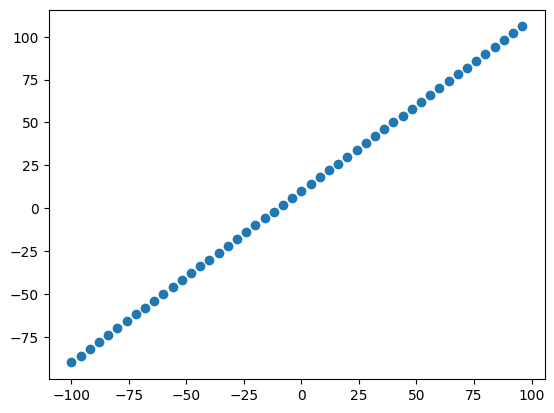

In [20]:
# plt.plot(X, y)
plt.scatter(X, y)

### The 3 sets...
* **Training set** - the model learns from this data, which is typically 70-80% of the data available
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model get evaluated on this data to test what it has learned,  this set is typically 10-15% of the data available

In [21]:
# Check the length of how many samples we have
len(X)

50

In [22]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test) 

(40, 10, 40, 10)

### Visualising the data

Now we've got our data in training and test sets.... let's visualize it again!

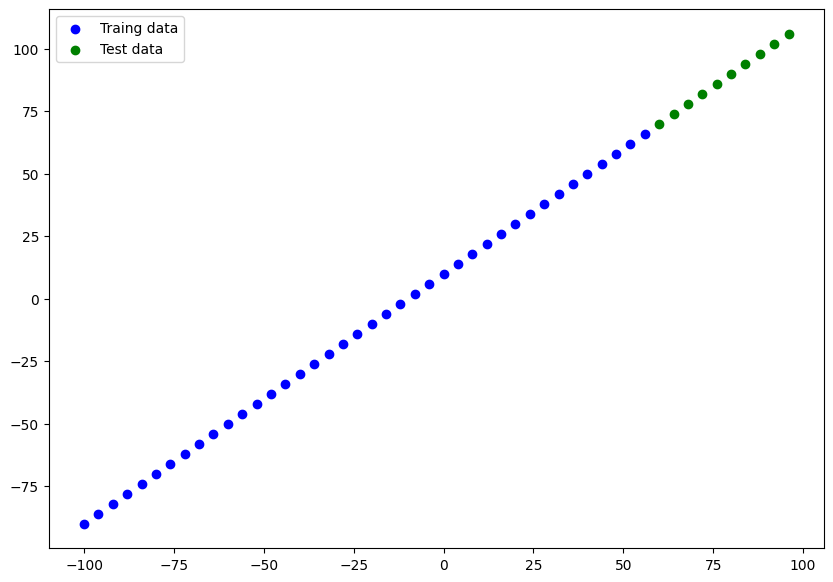

In [23]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c="b", label="Traing data")
plt.scatter(X_test, y_test, c="g", label="Test data")

plt.legend()

In [24]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae", 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"])

# 3. Fit the model
#model.fit(X_train, y_train, epochs=10)

In [25]:
# Raises an error
# model.summary()

In [26]:
# Let's create a model that builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parametrics (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during traing (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [27]:
model.fit(tf.expand_dims( X_train, axis=-1), y_train, epochs=100, verbose=0)

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


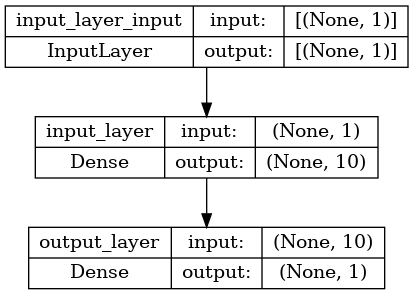

In [29]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Visualizing our model's predictions

To visualize predictions, it's good idea to plot them against the ground truth labels.

Often you'll see in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus our model's predictions).

In [30]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 33ms/step


array([[ 91.047   ],
       [ 96.99324 ],
       [102.939476],
       [108.88572 ],
       [114.83196 ],
       [120.7782  ],
       [126.72446 ],
       [132.67068 ],
       [138.61693 ],
       [144.56319 ]], dtype=float32)

In [31]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [32]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, 
                     test_data=X_test, test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Test data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend()

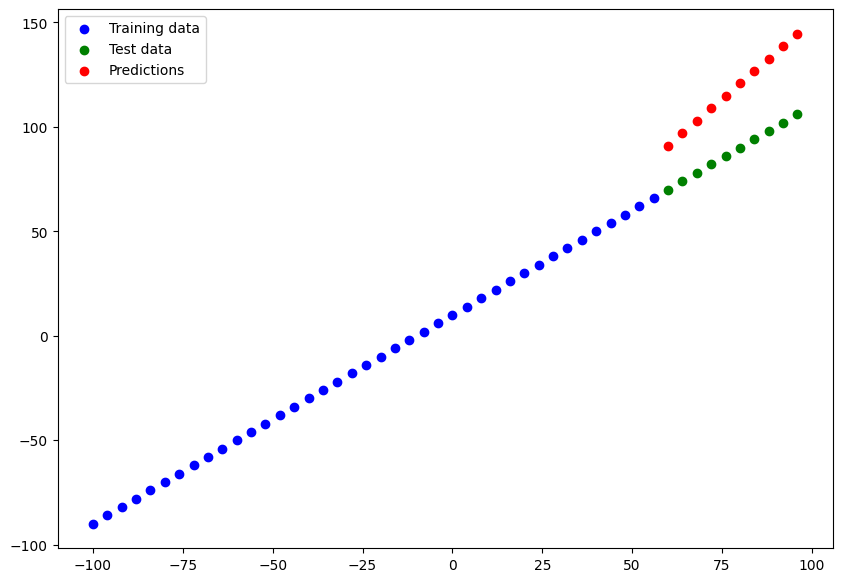

In [33]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

## Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be differetn evaluation metrics to evaluate your model's prfomance.

Since we're working on a regression,  two of the main metrics:
* **MAE** - mean absolute error, "on average, how wrong is each of my modeläs predictions"
  - As a great starter metric for any regression problem
* **MSE** - mean squared error, "square the average errors"
  - When larger errors are more significant than smaller errors.
* **Huber**
  - Combination of MSE and MAE. Less sensitive to outliers than MSE.

In [34]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 79ms/step - loss: 29.8051 - mae: 29.8051


[29.805084228515625, 29.805084228515625]

In [35]:
y_pred = model.predict(X_test) # shape (10, 1), y_test shape (10, )
y_pred = tf.constant(y_pred) # np array to tensor
y_pred = tf.squeeze(y_pred) # shape (10, ) same as y_test

# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred)

# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test, y_pred)

mae, mse

1/1 [==============================] - 0s 13ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=29.805084>,
 <tf.Tensor: shape=(), dtype=float32, numpy=919.59296>)

## Runnng experiments to improve out model

build -> fit -> evaluate -> tweak -> fit - evaluate -> tweak -> ...

1. Get more  data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the originl mmodel, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [36]:
# Build model 1

# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])


# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 29ms/step


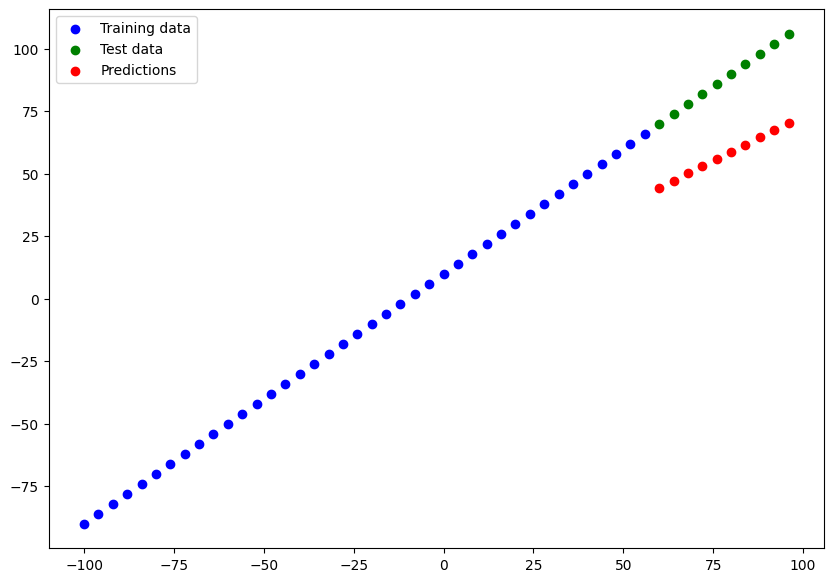

In [37]:
# Make and plot predictions 
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [38]:
# Calculate model_1 evaluation metrics
mae_1 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_1))
mse_1 = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.636883>,
 <tf.Tensor: shape=(), dtype=float32, numpy=949.0553>)

In [39]:
# Build model 2

# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])


# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 33ms/step


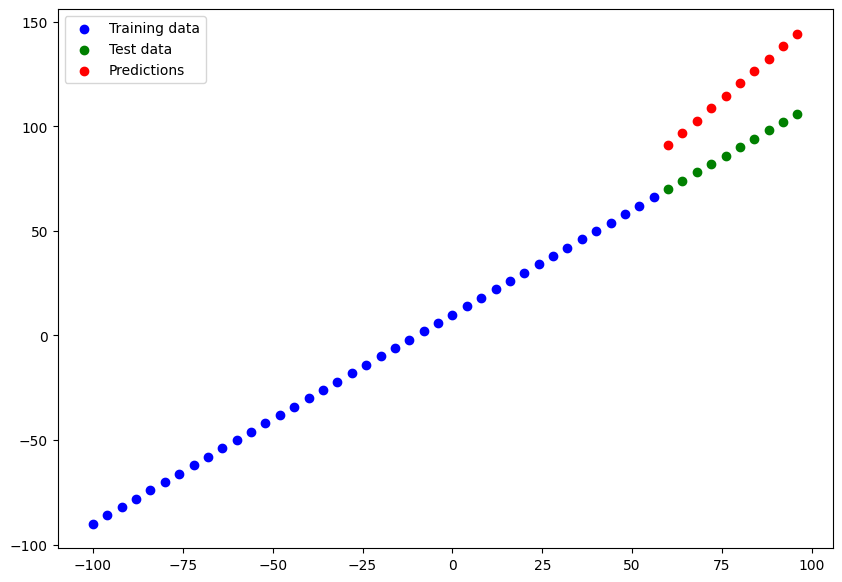

In [40]:
# Make and plot predictions 
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [41]:
# Calculate model_1 evaluation metrics
mae_2 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_2))
mse_2 = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.519262>,
 <tf.Tensor: shape=(), dtype=float32, numpy=902.22784>)

In [42]:
# Build model 3

# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])


# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 32ms/step


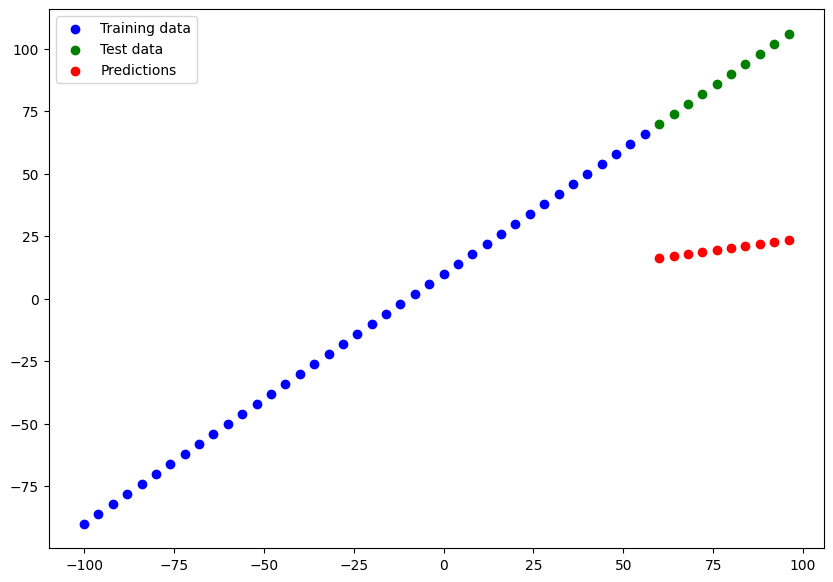

In [43]:
# Make and plot predictions 
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [44]:
# Calculate model_1 evaluation metrics
mae_3 = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_3))
mse_3 = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.078865>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4719.435>)

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [45]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [
    ["model_1", mae_1.numpy(), mse_1.numpy()],
    ["model_2", mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()],
]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.636883,949.055298
1,model_2,29.519262,902.227844
2,model_3,68.078865,4719.435059


In [46]:
# Looks like model 2 performed the best
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Saving our models

Saving our models allows us to use them outside jupyter notebook/google colab (or wherever the were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [47]:
# Save model
model_2.save("saved_models/section_03_model_2")

INFO:tensorflow:Assets written to: saved_models/section_03_model_2/assets


INFO:tensorflow:Assets written to: saved_models/section_03_model_2/assets


In [48]:
# Save model using the HDF5 format
model_2.save("saved_models/section_03_model_2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading our model



In [49]:
# Load in the SavedModel format model
loaded_SavedFormat_model = tf.keras.models.load_model("saved_models/section_03_model_2")
loaded_SavedFormat_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model_2_preds = model_2.predict(X_test)
loaded_SavedFormat_model_preds = loaded_SavedFormat_model.predict(X_test)
model_2_preds == loaded_SavedFormat_model_preds

1/1 [==============================] - 0s 31ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [52]:
# Load in a model using hdf5 format
loaded_h5_model = tf.keras.models.load_model("saved_models/section_03_model_2.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
loaded_h5_model_preds == model_2_preds

1/1 [==============================] - 0s 31ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [54]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [56]:
insurance_one_hot = pd.get_dummies(insurance) * 1.0
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [57]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [58]:
# booleans to ints, ints to floats
X.sex_female.dtype

dtype('float64')

In [59]:
X.head(), y.head()

(    age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0  19.0  27.900       0.0         1.0       0.0        0.0         1.0   
 1  18.0  33.770       1.0         0.0       1.0        1.0         0.0   
 2  28.0  33.000       3.0         0.0       1.0        1.0         0.0   
 3  33.0  22.705       0.0         0.0       1.0        1.0         0.0   
 4  32.0  28.880       0.0         0.0       1.0        1.0         0.0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0               0.0               0.0               0.0               1.0  
 1               0.0               0.0               1.0               0.0  
 2               0.0               0.0               1.0               0.0  
 3               0.0               1.0               0.0               0.0  
 4               0.0               1.0               0.0               0.0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.8

In [60]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [61]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46.0,19.95,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,47.0,24.32,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,52.0,24.86,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,39.0,34.32,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,54.0,21.47,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [62]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)


In [63]:
# Check the results of the insurance model on the test data
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 838us/step - loss: 8696.6846 - mae: 8696.6846


[8696.6845703125, 8696.6845703125]

In [64]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

### Let's try to improve the model

In [65]:
# Lets add an extra layer and Adam optimizer
# Build a neural network
tf.random.set_seed(42)

# 1. Create model
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model2.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model2.fit(X_train, y_train, epochs=100, verbose=0)

In [66]:
# Check the results of the insurance model on the test data
model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 841us/step - loss: 4828.1362 - mae: 4828.1362


[4828.13623046875, 4828.13623046875]

In [67]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [68]:
# Lets run 200 epochs
# Build a neural network
tf.random.set_seed(42)

# 1. Create model
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model3.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
history = model3.fit(X_train, y_train, epochs=200, verbose=0)

In [69]:
# Check the results of the insurance model on the test data
model3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 839us/step - loss: 3502.8267 - mae: 3502.8267


[3502.82666015625, 3502.82666015625]

Text(0.5, 0, 'epochs')

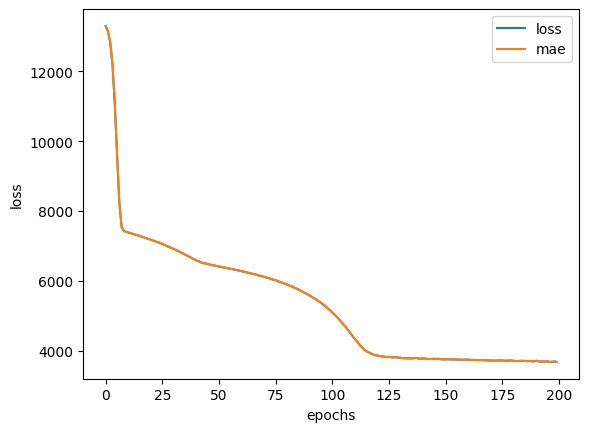

In [70]:
# Plot history (also known as a loss curve or a training curve).
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Check **early stopping callback**

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you are not sure on which to use, you could try both and see which performs better.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [81]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [83]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMxScaler) and OneHotEcoder
X_train_normal = ct.transform(X_train)
X_test_normal =  ct.transform(X_test)

In [86]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [87]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [88]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build neural network model on it and see how it goes

In [91]:
# Lets run 200 epochs
# Build a neural network
tf.random.set_seed(42)

# 1. Create model
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model4.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
history = model4.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [92]:
model4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 870us/step - loss: 3438.5100 - mae: 3438.5100


[3438.510009765625, 3438.510009765625]